In [1]:
%matplotlib inline

import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

"done"

'done'

# README

This notebook plots q(mRESP) - q(RESP) of an atom as a function of Euclidean distance between the atom and halogen.

In [2]:
halogens = "chlorine bromine iodine".split()

# initialize containers
distances = {}
diffs = {}

for halogen in halogens:
    
    dirs = sorted(glob.glob(f"../{halogen}/ZINC*"))
    
    distances[halogen] = []
    diffs[halogen] = []
    
    for dir_ in dirs:
        
        df = pd.read_csv(dir_ + "/overview.csv")
        
        distances[halogen] += list(df["distance"])
        diffs[halogen] += list(df["q_mod"] - df["q_std"])
        
"done"

'done'

In [3]:
for halogen in halogens:
    with open(f"../{halogen}/euclidean.csv", "w") as out:
        out.write("distance,dq\n")
        
        for distance, diff in zip(distances[halogen], diffs[halogen]):
            out.write(f"{distance:.5f},{diff:.5f}\n")
"done"

'done'

In [4]:
# styling plots,
matplotlib.rcParams["font.family"] = "Open Sans"
matplotlib.rcParams["font.size"] = 6
matplotlib.rcParams["lines.linewidth"] = 1
matplotlib.rcParams["axes.grid"] = True
matplotlib.rcParams["axes.grid.axis"] = "y"
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.left"] = False
matplotlib.rcParams["grid.color"] = "grey"
matplotlib.rcParams["grid.linestyle"] = "dotted"

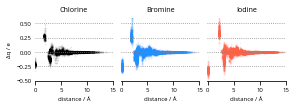

In [5]:
# some setup
colors = "black dodgerblue tomato".split()

# initialize figure
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(4,1.5), sharey=True)

for hal_id, hal in enumerate(halogens):
    df = pd.read_csv(f"../{hal}/euclidean.csv")
    
    ax = axs[hal_id]
    
    # plot
    ax.scatter(df["distance"], df["dq"], color=colors[hal_id], s=1, alpha=0.05, rasterized=True)
    
    # layout
    ax.set_xlim(-0.1,15)
    ax.set_xlabel("distance / Å")
    ax.tick_params(length=0, axis="y")
    ax.set_title(hal.capitalize())
    
    if hal_id == 0:
        ax.set_ylabel("Δq / e")
        ax.set_ylim(-0.5,0.6)

plt.tight_layout()
for ext in "png pdf".split():
    plt.savefig(f"../dq-vs-eucledian.{ext}", dpi=300)